#Q1 - Train Dataset

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_data_path = 'train.csv'  # Replace with the correct path if necessary
train_data = pd.read_csv(train_data_path)

# Preprocess the data
# Drop columns that are not useful for the model (e.g., Name, Ticket, PassengerId, Cabin)
train_data_cleaned = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values: Fill missing 'Age' with the mean and 'Embarked' with the mode
train_data_cleaned['Age'] = train_data_cleaned['Age'].fillna(train_data_cleaned['Age'].mean())
train_data_cleaned['Embarked'] = train_data_cleaned['Embarked'].fillna(train_data_cleaned['Embarked'].mode()[0])


# Encoding categorical variables 'Sex' and 'Embarked'
label_encoder_sex = LabelEncoder()
train_data_cleaned['Sex'] = label_encoder_sex.fit_transform(train_data_cleaned['Sex'])

label_encoder_embarked = LabelEncoder()
train_data_cleaned['Embarked'] = label_encoder_embarked.fit_transform(train_data_cleaned['Embarked'])

# Split the data into features (X) and target (y)
X = train_data_cleaned.drop(columns=['Survived'])
y = train_data_cleaned['Survived']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 81.01%
Confusion Matrix:
[[91 14]
 [20 54]]


#Q2 - Iris Dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train with default n_estimators=10
rf_model_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model_default.fit(X_train, y_train)

# Evaluate the accuracy score with default n_estimators
y_pred_default = rf_model_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with default n_estimators=10: {accuracy_default * 100:.2f}%")

# 2. Fine-tuning the model by changing n_estimators
best_accuracy = 0
best_n_estimators = 10

for n_estimators in [10, 50, 100, 200, 500]:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best accuracy achieved with n_estimators={best_n_estimators}: {best_accuracy * 100:.2f}%")

Accuracy with default n_estimators=10: 100.00%
Best accuracy achieved with n_estimators=10: 100.00%


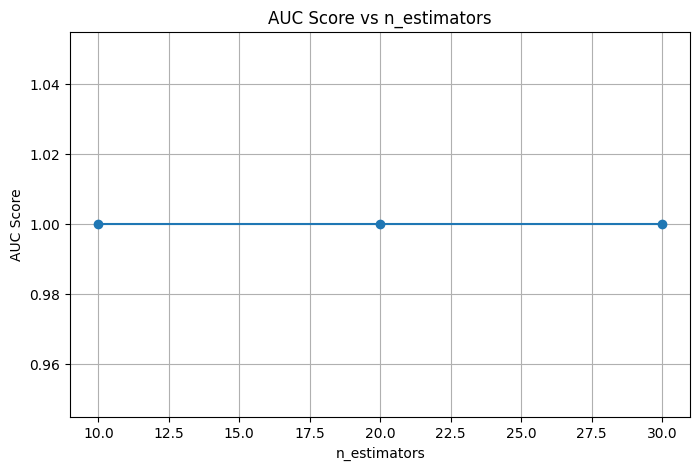

In [9]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output for AUC (multiclass)
y_binarized = label_binarize(y, classes=[0, 1, 2])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Track AUC scores
n_estimators_list = [10, 20, 30]
auc_scores = []

# Train and compute AUC for each n_estimators value
for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_prob = rf.predict_proba(X_test)

    # For multiclass AUC, concatenate predictions from all classifiers
    y_prob_combined = [prob[:, 1] for prob in y_prob]
    y_prob_stack = list(map(list, zip(*y_prob_combined)))

    # Compute macro AUC
    auc = roc_auc_score(y_test, y_prob_stack, average='macro', multi_class='ovr')
    auc_scores.append(auc)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, auc_scores, marker='o', linestyle='-')
plt.title("AUC Score vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC Score")
plt.grid(True)
plt.show()
